<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<center><font size=10>Applied Statistics</center></font>
<center><font size=5>Common Statistical Tests - Week 3</font></center>






<center><img src="https://cdn.pixabay.com/photo/2020/08/21/18/53/healthy-5506822__340.jpg" width="1000" height="600"></center>

<b><center><font size=5>Diet Case Study</font></center></b>


## **Problem Statement**

### **Business Context**

From children to adults to the elderly, the importance of a balanced diet can't be emphasized enough for any age group for a healthy lifestyle. A proper, well-balanced meal plan helps to attain ideal body weight and reduce the risk of chronic diseases like diabetes, cardiovascular and other types of cancer.

**The Health Company**, which provides various diet plans for weight loss, conducted a market test experiment to test three different kinds of diets (A, B, C). Each of the volunteers was given one of the three diet plans and asked to follow the diet for 6 weeks.

### **Objective**

In order to understand the effectiveness of each of the different diets for weight loss, the executives of the company reached out to you, a data scientist at the company. The weights before starting the diet and the weight 6 weeks after following the diet were recorded for 78 volunteers who were provided with either of the three diet plans. You have been asked to perform a statistical analysis to find evidence of whether the mean weight losses with respect to the three diet plans are significantly different. Consider a 5% significance level for the analysis.

### **Data Dictionary**









The *diet.csv* file contains the following information:

1. diet: Type of the diet
2. preweight: Weight (in kg) before following the diet plan
3. weight6weeks: Weight (in kg) after 6 weeks of following the diet plan

## **Let us start by importing the required libraries**

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==2.0.3 matplotlib==3.7.1 seaborn==0.13.1 scipy==1.11.4 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

## **Import the necessary libraries**



In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Library to help with statistical analysis
import scipy.stats as stats

## **Loading the dataset**

In [ ]:
# uncomment the below code cell to mount your google drive
#  from google.colab import drive
#  drive.mount('/content/drive')

In [ ]:
data = pd.read_csv('diet.csv')

In [ ]:
# copying data to another variable to avoid any changes to original data
df = data.copy()

## **Data Overview**

The initial steps to get an overview of any dataset is to:
- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

#### **Displaying the first few rows of the dataset**

In [ ]:
# looking at head (5 observations)
df.head()

,diet,preweight,weight6weeks
0,B,60,60.0
1,B,103,103.0
2,A,58,54.2
3,A,60,54.0
4,A,64,63.3


* The dataset contains the diet type, pre-weight and weight after 6 weeks for one person in each row.

#### **Checking the shape of the dataset**

In [ ]:
df.shape

(78, 3)

* The dataset contains 78 rows and 3 columns

#### **Checking the data types of the columns for the dataset**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   diet          78 non-null     object 
 1   preweight     78 non-null     int64  
 2   weight6weeks  78 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.0+ KB


* The `diet` column is categorical. While, `preweight` and `weight6weeks` are numerical.
* There are no missing values in the dataset

#### **Statistical summary of the dataset**

In [ ]:
df.describe()

,preweight,weight6weeks
count,78.000000,78.000000
mean,72.525641,68.680769
std,8.723344,8.924504
min,58.000000,53.000000
25%,66.000000,61.850000
50%,72.000000,68.950000
75%,78.000000,73.825000
max,103.000000,103.000000


* The average weight before any diet plan is 72.53 kg, while the average weight after 6 weeks of a diet plan is 68.68 kg. Overall, taking a diet has reduced the average weight.
* The variation in the weights is very similar before and after taking a diet.

#### **Value counts of different types of diet**

In [ ]:
df.diet.value_counts()

diet
B    27
C    27
A    24
Name: count, dtype: int64

* As mentioned in the problem statement, there are three types of diet plans: A, B, and C
* In the sample of 78 people, 27 each took diet plans B and C, while 24 took diet plan A

## **Creating a new column 'weightloss'**

To assess the loss in weight after taking a diet plan, we shall create a new column `weightloss` by subtracting the weight before taking the diet from the weight after taking the diet.

In [ ]:
# calculate the weight-loss
df['weightloss'] = df['weight6weeks'] - df['preweight']
df.head()

,diet,preweight,weight6weeks,weightloss
0,B,60,60.0,0.0
1,B,103,103.0,0.0
2,A,58,54.2,-3.8
3,A,60,54.0,-6.0
4,A,64,63.3,-0.7


* A negative value of `weightloss` indicates that the diet was effective in decreasing the weight of the person after 6 weeks

### **Visualize data**

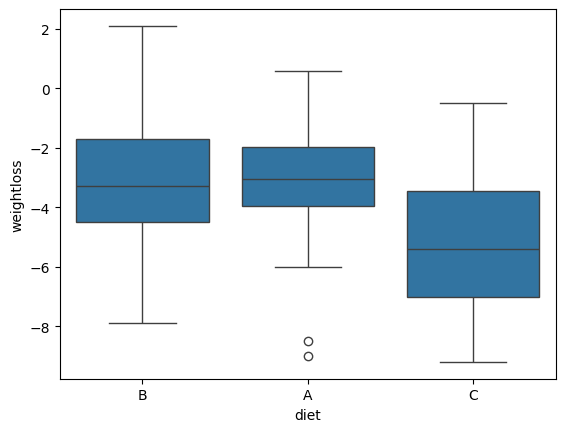

In [ ]:
# visual analysis of the weightloss for the three diet-plans
sns.boxplot(x="diet", y="weightloss", data = df)
plt.show()

* The distribution of weight loss seem to differ among the three groups.
* Diet plan C seems to impact the highest weight loss.
* The median weight loss seems to be very close for the plans A and B, but the variation is higher in the weight-losses by diet-plan B as compared to A.
* Is the osberved difference in weight loss among the three groups significant enough to conclude the same about the three diet plans? To determine this, we will test the difference using a statistical test.

## **Hypothesis Testing**

### **Step 1: Define null and alternative hypotheses**

The null and alternative hypotheses can be formulated as:

> $H_0$ : The mean weight losses with respect to each diet category is equal. <br>
> $H_a$ : At least one of the mean weight losses with respect to the three diet category is different.

### **Step 2: Select Appropriate test**

This is a problem, concerning three population means. One-way ANOVA is an appropriate test here provided normality and equality of variance assumptions are verified.

**One-way ANOVA test**

In a one-way ANOVA test, we compare the means from several populations to test if there is any significance difference between them. The results from an ANOVA test are most reliable when the assumptions of normality and equality of variances are satisfied.

* For testing of normality, Shapiro-Wilk’s test is applied to the response variable.

* For equality of variance, Levene test is applied to the response variable.

**Shapiro-Wilk’s test**

We will test the null hypothesis

>$H_0:$ The weight losses follow a normal distribution

against the alternative hypothesis

>$H_a:$ The weight losses do not not follow a normal distribution

In [ ]:
# Assumption 1: Normality
# Use the shapiro function for the scipy.stats library for this test

# find the p-value
w, p_value = stats.shapiro(df['weightloss'])
print('The p-value is', p_value)

The p-value is 0.8019888997077942


Since p-value of the test is very large than the 5% significance level, we fail to reject the null hypothesis that the response follows the normal distribution.

**Levene’s test**

We will test the null hypothesis

>$H_0$: All the population variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

In [ ]:
#Assumption 2: Homogeneity of Variance
# use levene function from scipy.stats library for this test

# find the p-value
statistic, p_value = stats.levene(df[df['diet']=='A']['weightloss'],
                            df[df['diet']=='B']['weightloss'],
                            df[df['diet']=='C']['weightloss'])
print('The p-value is', p_value)

The p-value is 0.5376731304274011


Since the p-value is large than the 5% significance level, we fail to reject the null hypothesis of homogeneity of variances.

### **Step 3: Decide the significance level**

As given in the problem statement, we select $\alpha = 0.05$

### **Step 4: Collect and prepare data**

In [ ]:
# create separate variables to store the weightlosses with respect to the three diet-plans
weightloss_diet_A = df[df['diet']=='A']['weightloss']
weightloss_diet_B = df[df['diet']=='B']['weightloss']
weightloss_diet_C = df[df['diet']=='C']['weightloss']

### **Step 5: Calculate the p-value**

- We will use the `f_oneway()` function from the `scipy.stats` library to perform a one-way ANOVA test.
- The `f_oneway()` function takes the sample observations from the different groups and returns the test statistic and the p-value for the test.
    - The sample observations are the values of weight losses with respect to the three diet-plans.

In [ ]:
# import the required function
from scipy.stats import f_oneway

# find the p-value
test_stat, p_value = f_oneway(weightloss_diet_A, weightloss_diet_B, weightloss_diet_C)
print('The p-value is ', p_value)

The p-value is  0.0032290142385893524


### **Step 6: Compare the p-value with $\alpha$**

In [ ]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.0032290142385893524 is less than the level of significance, we reject the null hypothesis.


### **Step 7:  Draw inference**

Since the p-value is less than the level of significance (5%), we reject the null hypothesis. Hence, we have enough statistical evidence to say that at least one of the mean weight losses with respect to the three diet-plans is different.

## **Conclusions**

* From the sample data, it was observed that taking a diet has reduced the average weight


* The variation in the weights is very similar before and after taking a diet


* From the sample data, it was observed that the diet-plan C has resulted in higher weight loss as compared to the other two plans


* There was enough statistical evidence to say that the effect on weight loss is different for at least one of the diet plans


* Further statistical analysis can be done to determine if the impact of diet-plan C is significantly greater than the other two plans


---